### About Dataset
The fish market dataset is a collection of data related to various species of fish and their characteristics. This dataset is designed for polynomial regression analysis and contains several columns with specific information. Here's a description of each column in the dataset:

Species: This column represents the species of the fish. It is a categorical variable that categorizes each fish into one of seven species. The species may include names like "Perch," "Bream," "Roach," "Pike," "Smelt," "Parkki," and "Whitefish." This column is the target variable for the polynomial regression analysis, where we aim to predict the fish's weight based on its other attributes.

Weight: This column represents the weight of the fish. It is a numerical variable that is typically measured in grams. The weight is the dependent variable we want to predict using polynomial regression.

Length1: This column represents the first measurement of the fish's length. It is a numerical variable, typically measured in centimetres.

Length2: This column represents the second measurement of the fish's length. It is another numerical variable, typically measured in centimetres.

Length3: This column represents the third measurement of the fish's length. Similar to the previous two columns, it is a numerical variable, usually measured in centimetres.

Height: This column represents the height of the fish. It is a numerical variable, typically measured in centimetres.

Width: This column represents the width of the fish. Like the other numerical variables, it is also typically measured in centimetres.

The dataset is structured in such a way that each row corresponds to a single fish with its species and various physical measurements (lengths, height, and width). The goal of using polynomial regression on this dataset would be to build a predictive model that can estimate the weight of a fish based on its species and the provided physical measurements. Polynomial regression allows for modelling more complex relationships between the independent variables (lengths, height, and width) and the dependent variable (weight), which may be particularly useful if there are non-linear patterns in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


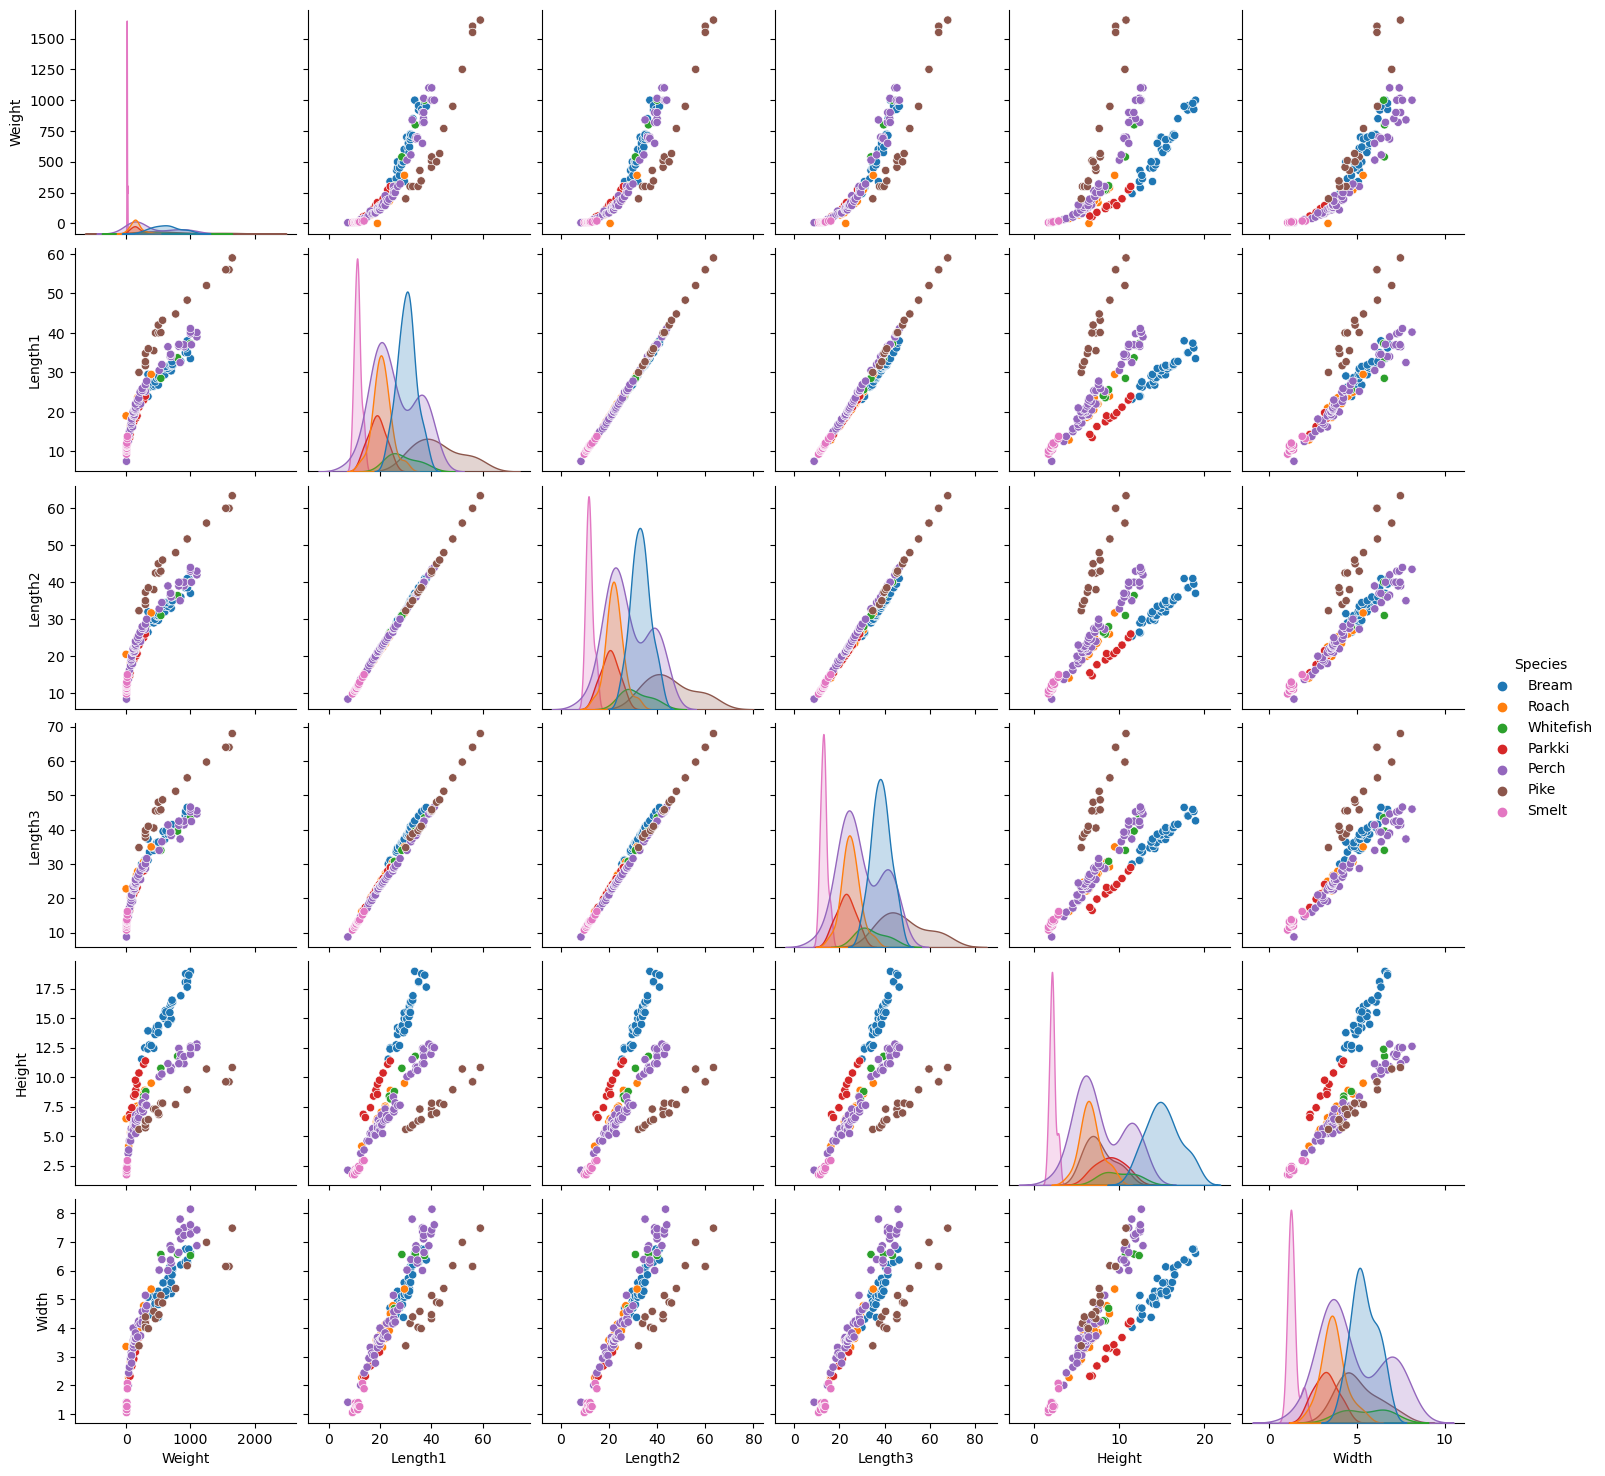

In [6]:
sns.pairplot(df,hue='Species')

In [7]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [8]:
mapping={'Bream':1, 'Roach':2, 'Whitefish':3, 'Parkki':4, 'Perch':5, 'Pike':6, 'Smelt':6}
df['Species']=df['Species'].map(mapping)
df.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340
5,1,450.0,26.8,29.7,34.7,13.6024,4.9274
6,1,500.0,26.8,29.7,34.5,14.1795,5.2785
7,1,390.0,27.6,30.0,35.0,12.6700,4.6900
8,1,450.0,27.6,30.0,35.1,14.0049,4.8438
9,1,500.0,28.5,30.7,36.2,14.2266,4.9594


In [9]:
df['Species'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [10]:
df['Species'].value_counts()

5    56
1    35
6    31
2    20
4    11
3     6
Name: Species, dtype: int64

<AxesSubplot:>

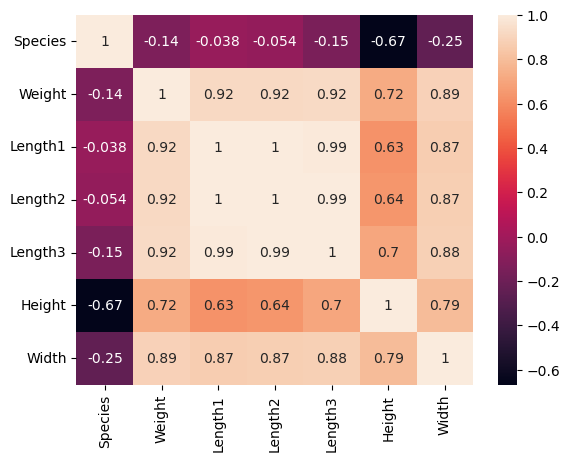

In [11]:
sns.heatmap(df.corr(), annot=True)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X=df.drop('Species',axis=1)
y=df['Species']

In [14]:
X.shape,y.shape

((159, 6), (159,))

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_ = pd.DataFrame(X_scaled, columns=X.columns)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                            random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((127, 6), (32, 6), (127,), (32,))

In [17]:
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix,precision_score

In [18]:
clf = svm.LinearSVC(dual=False)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.86      1.00      0.92        12
           6       1.00      0.83      0.91         6

    accuracy                           0.94        32
   macro avg       0.81      0.81      0.81        32
weighted avg       0.92      0.94      0.92        32

[[ 7  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  1  5]]


C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [20]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_predict = rfc.predict(X_test)

print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.33      0.25      0.29         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.71      0.83      0.77        12
           6       0.86      1.00      0.92         6

    accuracy                           0.78        32
   macro avg       0.65      0.66      0.65        32
weighted avg       0.75      0.78      0.76        32



C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model)
best_rf_model = grid_search.best_estimator_

# Optionally, you can use the best model to make predictions on your test set
y_pred = best_rf_model.predict(X_test)  # Assuming X_test is your test data


C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DINESH\anaconda3\lib\site-

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [22]:

rfc = RandomForestClassifier(min_samples_split= 5)
rfc.fit(X_train, y_train)

y_predict = rfc.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.20      0.25      0.22         4
           3       0.00      0.00      0.00         1
           4       1.00      0.50      0.67         2
           5       0.69      0.75      0.72        12
           6       0.86      1.00      0.92         6

    accuracy                           0.72        32
   macro avg       0.62      0.56      0.58        32
weighted avg       0.73      0.72      0.71        32



C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(clf, 'trained_model.joblib')


['trained_model.joblib']

In [24]:
import joblib

# Load the model
loaded_model = joblib.load('trained_model.joblib')

# Check the type of the loaded model
print(type(loaded_model))


<class 'sklearn.svm._classes.LinearSVC'>


In [27]:
# import pickle

# # Assuming 'model' is your trained model
# with open('trained_model.pkl', 'wb') as model_file:
#     pickle.dump(model, model_file)


In [28]:
# import pickle

# # Load the model
# with open('trained_model.pkl', 'rb') as model_file:
#     loaded_model = pickle.load(model_file)


In [29]:
X_test.head()
y.iloc[21]

1

In [30]:
ypred=loaded_model.predict(X_test)

In [31]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.86      1.00      0.92        12
           6       1.00      0.83      0.91         6

    accuracy                           0.94        32
   macro avg       0.81      0.81      0.81        32
weighted avg       0.92      0.94      0.92        32



C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
X_test.head()
y.iloc[21]
test=[[685.0,31.4,34.0,39.2,15.9936,5.3704]]
# test = scaler.transform(test)
ypred=loaded_model.predict(test)

C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [33]:
ypred[0]

1

In [34]:
X_test.head()
y.iloc[21]

1

since both predicted and true are same 

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier


from lightgbm import LGBMClassifier
import lazypredict
# from lazypredict.Supervised import LazyClassifier
import time
import warnings
warnings.filterwarnings('ignore')

In [36]:
from lazypredict.Supervised import LazyClassifier

In [38]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=3,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)
# clear_output()

 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:01<00:00, 22.66it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 244
[LightGBM] [Info] Number of data points in the train set: 127, number of used features: 6
[LightGBM] [Info] Start training from score -1.511983
[LightGBM] [Info] Start training from score -2.071598
[LightGBM] [Info] Start training from score -3.234749
[LightGBM] [Info] Start training from score -2.646963
[LightGBM] [Info] Start training from score -1.059997
[LightGBM] [Info] Start training from score -1.625311
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.24it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
# pip install lightgbm

In [ ]:
# pip install lazypredict


In [ ]:
# pip install --upgrade lazypredict


In [ ]:
# pip install --upgrade scikit-learn


In [39]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.94,0.94,None,0.93,0.03
QuadraticDiscriminantAnalysis,0.94,0.82,None,0.92,0.02
DecisionTreeClassifier,0.75,0.78,None,0.75,0.02
Perceptron,0.84,0.71,None,0.84,0.02
ExtraTreesClassifier,0.78,0.68,None,0.77,0.18
RandomForestClassifier,0.78,0.66,None,0.76,0.28
LinearSVC,0.84,0.65,None,0.82,0.03
LabelPropagation,0.78,0.64,None,0.75,0.02
BaggingClassifier,0.75,0.64,None,0.72,0.07
